<a href="https://colab.research.google.com/github/Carol-Nunes/Transfer-Learning-Project-in-Python/blob/main/Exercicio_Projeto_de_Transfer_Learning_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Importação das bibliotecas

%matplotlib inline

import os

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# Importação do código, bibliotecas e classes do Keras.

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [25]:
# Pegando o Dataset

root = '/content/sample_data/PetImages'
exclude = ['/content/sample_data/PetImages/Dog/.ipynb_checkpoints', '/content/sample_data/PetImages/.ipynb_checkpoints', '/content/sample_data/PetImages/Cat/.ipynb_checkpoints']
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]


print(categories)

['/content/sample_data/PetImages/Dog', '/content/sample_data/PetImages/Cat']


In [26]:
# Função auxiliar usada para carregar a imagem e retorná-la, além de adcionar um vetor de entrada


def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [27]:
# Carregando todas as imagens da pasta raiz

data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})


# Contando o número de classes

num_classes = len(categories)

In [28]:
# Randomizando a ordem dos dados

random.shuffle(data)

In [29]:
# Criando um conjunto para treinamento, validação e teste

idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [30]:
# Separando os dados por rótulos

x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]


In [31]:
# Normalizando meus dados e convertendo os rótulos em vetores One-hot

x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(301, 2)


In [32]:
# Criando o meu sumário, ele traz um resumo acerca dos dados

print("Foram carregadas %d imagens de %d categorias"%(len(data), num_classes))
print("Dados de treinamento / validação / teste: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("Forma dos dados de treinamento: ", x_train.shape)
print("Forma dos rótulos de treinamento: ", y_train.shape)



Foram carregadas 2002 imagens de 2 categorias
Dados de treinamento / validação / teste: 1401, 300, 301
Forma dos dados de treinamento:  (1401, 224, 224, 3)
Forma dos rótulos de treinamento:  (1401, 2)


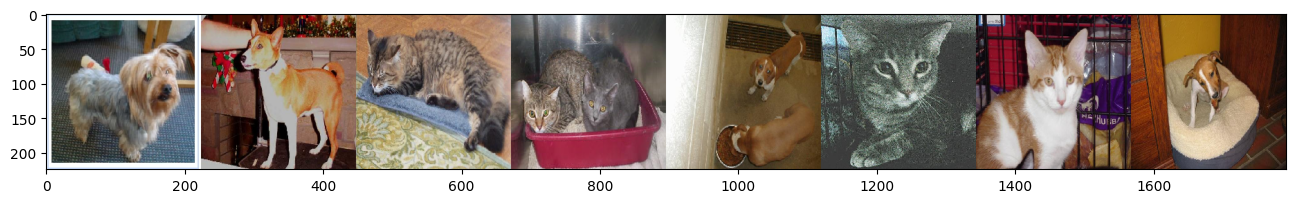

In [33]:
# Visualização de algumas imagens do Dataset

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size = (224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [34]:
# Construindo a rede neural de treinamento do zero

model = Sequential()
print("Dimensões dos input's: ", x_train.shape[1:])

model.add(Conv2D(32, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()













Dimensões dos input's:  (224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compilando o modelo para usar a função de perda de entropia cruzada categórica e o otimizador adadelta

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 20,
                    validation_data = (x_val, y_val))



Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.4873 - loss: 0.7148 - val_accuracy: 0.4833 - val_loss: 0.6930
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5023 - loss: 0.6910 - val_accuracy: 0.5733 - val_loss: 0.6645
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5946 - loss: 0.6629 - val_accuracy: 0.5767 - val_loss: 0.6597
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6357 - loss: 0.6300 - val_accuracy: 0.6400 - val_loss: 0.6157
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6731 - loss: 0.6017 - val_accuracy: 0.6567 - val_loss: 0.5982
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6917 - loss: 0.5800 - val_accuracy: 0.7000 - val_loss: 0.5509
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7440 - loss: 0.5131 - val_accuracy: 0.6367 - val_loss: 0.6452
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7198 - loss: 0.5590 - val_accuracy: 0.7267 -

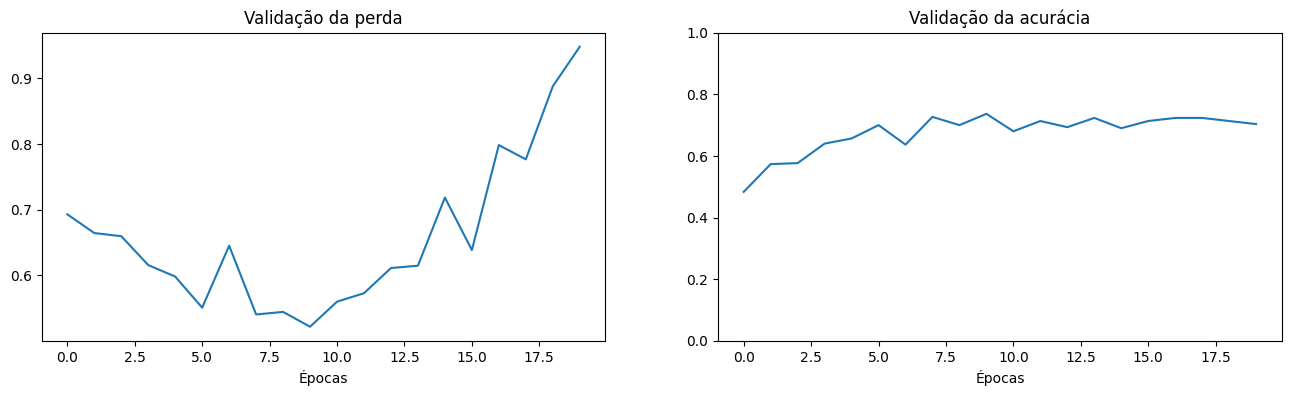

In [36]:
# Plotando a validação de perda e de acurácia ao longo do tempo

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(121)
ax.plot(history.history['val_loss'])
ax.set_title('Validação da perda')
ax.set_xlabel('Épocas')

ax2 = fig.add_subplot(122)
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Validação da acurácia')
ax2.set_xlabel('Épocas')
ax2.set_ylim(0, 1)

plt.show()

In [37]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Teste de perda: ', loss)
print('Teste de Acurácia: ', accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7153 - loss: 0.8863
Teste de perda:  0.9884508848190308
Teste de Acurácia:  0.7009966969490051


In [38]:
# Agora faremos novamente o Transfer Learning, porém usando uma rede já existente

vgg = keras.applications.VGG16(weights = 'imagenet', include_top = True)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Referência à camada de entrada da VGG16

inp = vgg.input

# Criando uma nova camda softmax com o número de neurônios correspondendo ao número de classes

new_classification_layer = Dense(num_classes, activation = 'softmax')

# Conectando à nossa nova camada com a primeira e a última camada da VGG16

out = new_classification_layer(vgg.layers[-2].output)

# Criando uma nova rede entre a entrada e a saída

model_new = Model(inp, out)





In [40]:
# Deixando todas as camadas com seus pesos congelados (ou seja, elas não são treinadas), exceto a última

for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = True

# Compilando

model_new.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_new.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history2 = model_new.fit(x_train, y_train,
                         batch_size = 32,
                         epochs = 20,
                         validation_data = (x_val, y_val))

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 587ms/step - accuracy: 0.5039 - loss: 62.6394 - val_accuracy: 0.5167 - val_loss: 1.5030
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 509ms/step - accuracy: 0.4926 - loss: 1.2009 - val_accuracy: 0.4833 - val_loss: 0.7007
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 500ms/step - accuracy: 0.5236 - loss: 0.6919 - val_accuracy: 0.5167 - val_loss: 0.6917
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 505ms/step - accuracy: 0.5196 - loss: 1.0000 - val_accuracy: 0.5167 - val_loss: 0.6938
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 503ms/step - accuracy: 0.5178 - loss: 0.7003 - val_accuracy: 0.5167 - val_loss: 0.7070
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 504ms/step - accuracy: 0.4945 - loss: 0.7059 - val_accuracy: 0.5267 - val_loss: 0.6943
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 522ms/step - accuracy: 0.5627 - loss: 0.6870 - val_accuracy: 0.5267 - val_loss: 0.6866
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 534ms/step - accuracy: 0.5639 - loss: 0.6794 - val_acc

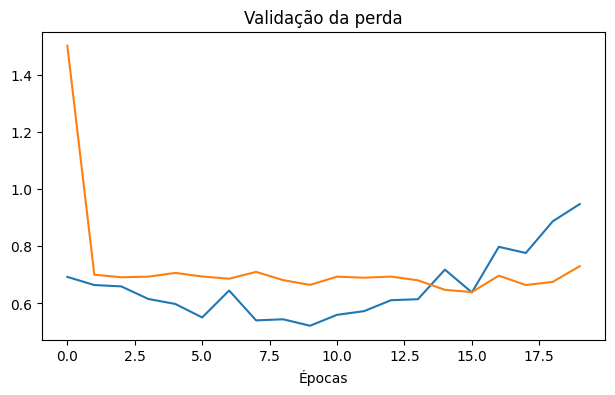

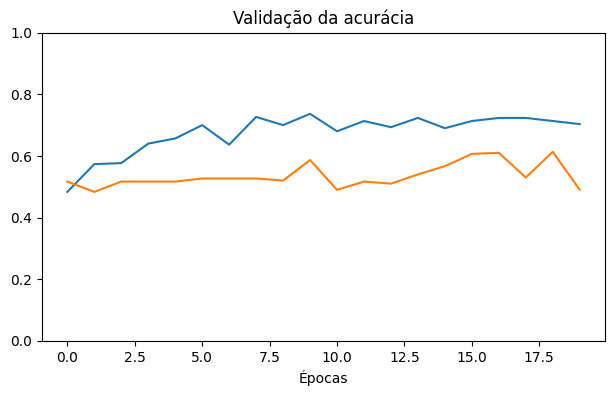

In [42]:
# Plotando os gráficos de perda e acurácia novamente, porém, dessa vez, vamos comparar o modelo original treinado (linha azul) e o novo modelo de transfer learning (em laranja).

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(121)
ax.plot(history.history['val_loss'])
ax.plot(history2.history['val_loss'])
ax.set_title('Validação da perda')
ax.set_xlabel('Épocas')

fig = plt.figure(figsize = (16, 4))
ax2 = fig.add_subplot(122)
ax2.plot(history.history['val_accuracy'])
ax2.plot(history2.history['val_accuracy'])
ax2.set_title('Validação da acurácia')
ax2.set_xlabel('Épocas')
ax2.set_ylim(0, 1)

plt.show()

In [44]:
# Para finalizar, faremos uma validação final no conjunto de teste.

loss, accuracy = model_new.evaluate(x_test, y_test, verbose = 0)
print('Teste de perda: ', loss)
print('Teste de acurácia: ', accuracy)

Teste de perda:  0.7300847172737122
Teste de acurácia:  0.5182723999023438


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


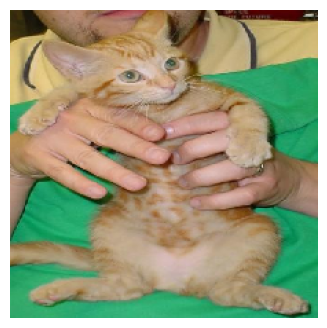

[[1.0000000e+00 1.6937122e-18]]


In [46]:
# Para prever uma nova imagem, basta rodar o código a seguir a fim de obter as probabilidades de cada classe

img, x = get_image('/content/sample_data/PetImages/Cat/1001.jpg')
probabilities = model_new.predict([x])

plt.figure(figsize = (16, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

print(probabilities)